In [1]:
# import required libraries
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime 
import requests
import csv
import pprint
import requests

import pandas as pd                        
from pytrends.request import TrendReq
import tweepy
import json
import re
import os
import OpenBlender
from io import StringIO

import sweetviz 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from nltk.tokenize import TweetTokenizer


sns.set()

sns.set_style('whitegrid')

%matplotlib inline
pd.set_option('display.max_colwidth', 100)

# This actually makes autocomplete WAY faster ...
%config Completer.use_jedi = False

import plotly.express as px

import re
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

from textblob import TextBlob



# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# nltk.download([
#     "names",
#     "stopwords",
#     "state_union",
#      "twitter_samples",
#    "movie_reviews",
#    "averaged_perceptron_tagger",
#    "vader_lexicon",
#    "punkt" ])








# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

In [2]:
#Loadind the master_data_file for bitcoin 

In [3]:
bitcoin_master_df = pd.read_excel("bitcoin_master_data.xlsx")

bitcoin_master_df

,Name,Symbol,Date,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,Bitcoin,BTC,2021-01-02,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,Bitcoin,BTC,2021-01-03,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,Bitcoin,BTC,2021-01-04,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,Bitcoin,BTC,2021-01-05,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,Bitcoin,BTC,2021-01-06,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,Bitcoin,BTC,2021-01-07,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,Bitcoin,BTC,2021-01-08,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,Bitcoin,BTC,2021-01-09,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,Bitcoin,BTC,2021-01-10,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,Bitcoin,BTC,2021-01-11,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


In [4]:
#checking of null values 

bitcoin_master_df.isnull().sum()

#no null values found good to go for next thing 

Name                   0
Symbol                 0
Date                   0
High                   0
Low                    0
Open                   0
Close                  0
market_billion_usd$    0
volume_billion_usd$    0
Day_Pct%_Change        0
Trend                  0
Target                 0
polarity               0
subjectivity           0
dtype: int64

# Is Dataset Imbalanced ?

# ●Data is imbalanced if
# there are more records of one class compared to other classes
# ●Imbalanced data may lead to the accuracy paradox 



<AxesSubplot:xlabel='Target', ylabel='count'>

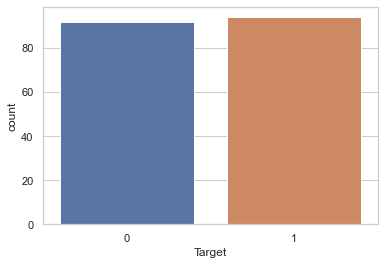

In [5]:
#checking for balance dataset i,e distribution of target variable

sns.countplot(bitcoin_master_df["Target"])

In [6]:

#checking for value counts and percentange distribution of target variables

print("value counts of target variable : \n \n \b \b \b \b \b \b",bitcoin_master_df["Target"].value_counts())

print("********************\n")

print("percentage distribution of target variable : \n \n",bitcoin_master_df["Target"].value_counts(normalize=True)*100)

value counts of target variable : 
 
       1    94
0    92
Name: Target, dtype: int64
********************

percentage distribution of target variable : 
 
 1   50.537634
0   49.462366
Name: Target, dtype: float64


In [7]:
bitcoin_master_df.polarity.describe()

count   186.000000
mean      0.087058
std       0.022952
min      -0.041589
25%       0.074016
50%       0.084314
75%       0.097465
max       0.214729
Name: polarity, dtype: float64

In [8]:
bitcoin_master_df.subjectivity.describe()

count   186.000000
mean      0.273811
std       0.024199
min       0.195050
25%       0.258840
50%       0.271902
75%       0.290178
max       0.356854
Name: subjectivity, dtype: float64

In [9]:
bitcoin_master_df["Target"] =  bitcoin_master_df["Target"].astype("category")

bitcoin_master_df

,Name,Symbol,Date,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,Bitcoin,BTC,2021-01-02,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,Bitcoin,BTC,2021-01-03,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,Bitcoin,BTC,2021-01-04,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,Bitcoin,BTC,2021-01-05,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,Bitcoin,BTC,2021-01-06,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,Bitcoin,BTC,2021-01-07,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,Bitcoin,BTC,2021-01-08,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,Bitcoin,BTC,2021-01-09,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,Bitcoin,BTC,2021-01-10,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,Bitcoin,BTC,2021-01-11,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


# Analyzing trends between  polarity and closing price 
# Analyzing trends between  polarity and daily percentage change 

<Figure size 72x1440 with 0 Axes>

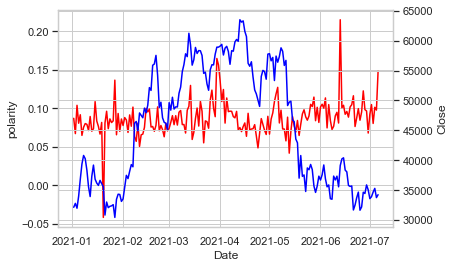

In [10]:
#Analyzing trends between  polarity and closing price 

plt.figure(figsize=(1,20))

fig,ax = plt.subplots()


sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["polarity"], color="red",ax=ax)

ax2=ax.twinx()

sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["Close"],color="blue",ax=ax2)

plt.show()


fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

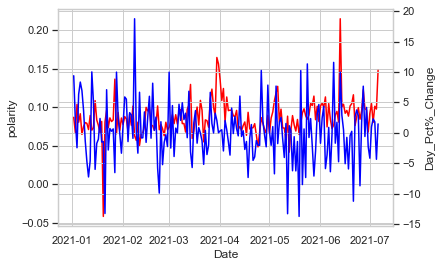

In [187]:

#Analyzing trends between  polarity and daily percentage change 
# plt.figure(figsize=(10,20))

fig,ax = plt.subplots()


sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["polarity"],markers=True ,color="red")

ax2=ax.twinx()

sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["Day_Pct%_Change"],markers = True,color="blue")

plt.show()


fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

#Inferences :

from line plot it is looking like there seems to be somewhat similar pattern between sentiments and 
date 

so as whenver sentiments are increasing closing price also seems to be fluctuating in similar trend to sentiments 

also sentiments predicted fall in closing price in mid of january in very accurate way as evident from the graph 



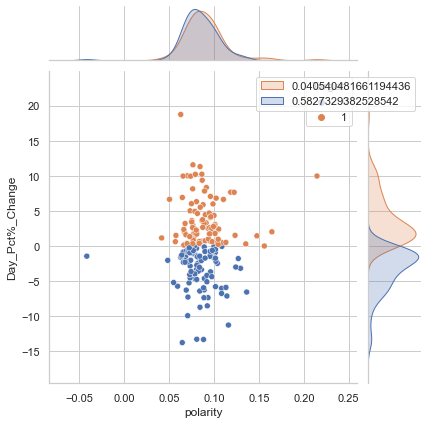

In [188]:
from scipy.stats import stats

sns.jointplot(bitcoin_master_df["polarity"],bitcoin_master_df["Day_Pct%_Change"],hue =bitcoin_master_df["Target"])

plt.legend(stats.pearsonr(bitcoin_master_df["Day_Pct%_Change"],bitcoin_master_df["polarity"]))


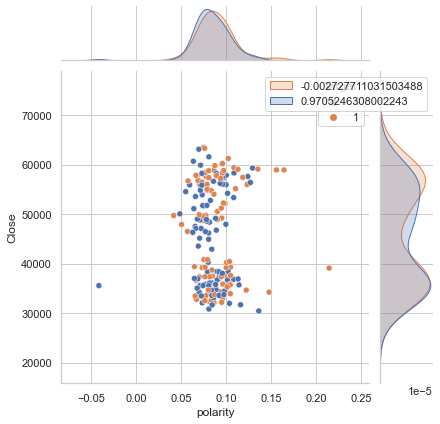

In [189]:
from scipy.stats import stats

sns.jointplot(bitcoin_master_df["polarity"],bitcoin_master_df["Close"],hue =bitcoin_master_df["Target"])

plt.legend(stats.pearsonr(bitcoin_master_df["Close"],bitcoin_master_df["polarity"]))


# CHECKING FOR MULTICOLLINEARITY AND HEAT MAP ANALYSIS FOR CORRELATION BETWEEN VARIABLES 

<AxesSubplot:>

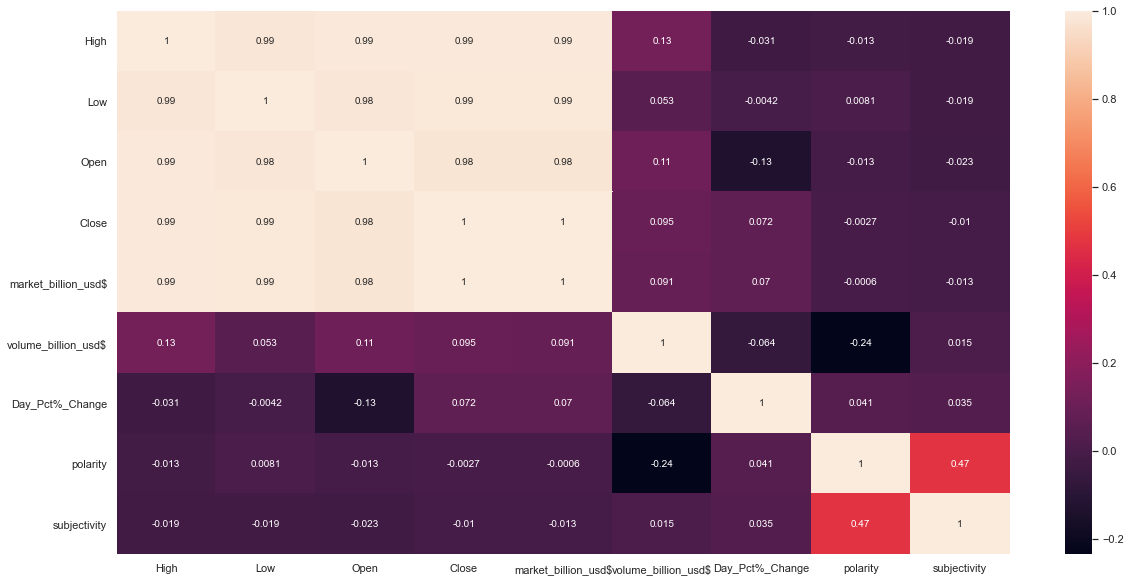

In [190]:



plt.figure(figsize=(20,10))
sns.heatmap(bitcoin_master_df.corr(),annot=True)

<AxesSubplot:>

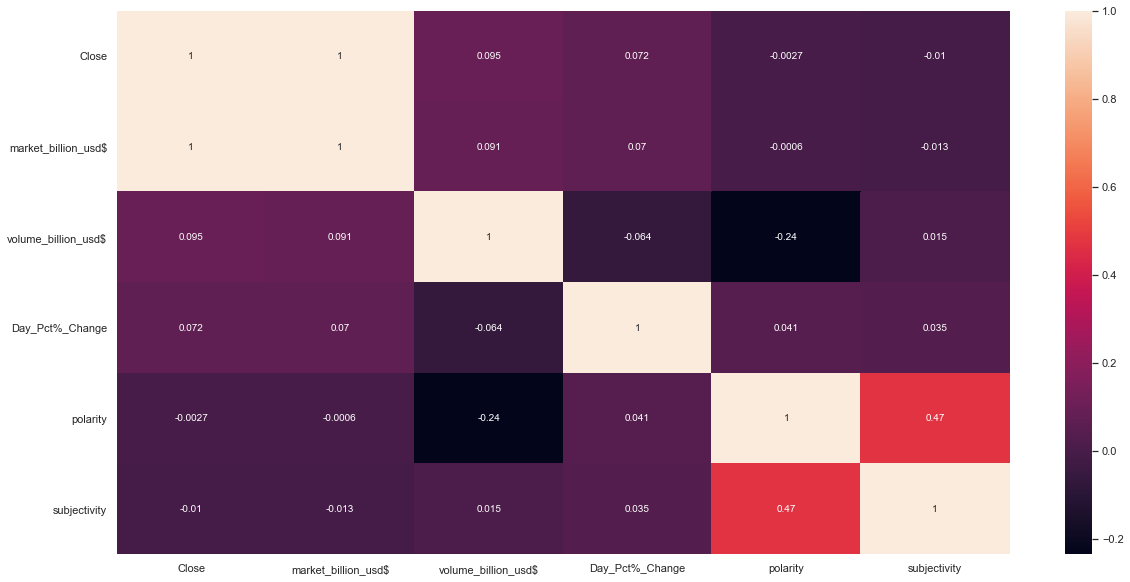

In [135]:
#there seems to be high correlation between high ,open ,close ,market_billion among each other 

#so if we want to apply logistic regression then we need to drop this variables 

bitcoin_master_df.drop(["Open","Low","High"],axis = 1 ,inplace =True)

bitcoin_master_df

plt.figure(figsize=(20,10))
sns.heatmap(bitcoin_master_df.corr(),annot=True)

<AxesSubplot:>

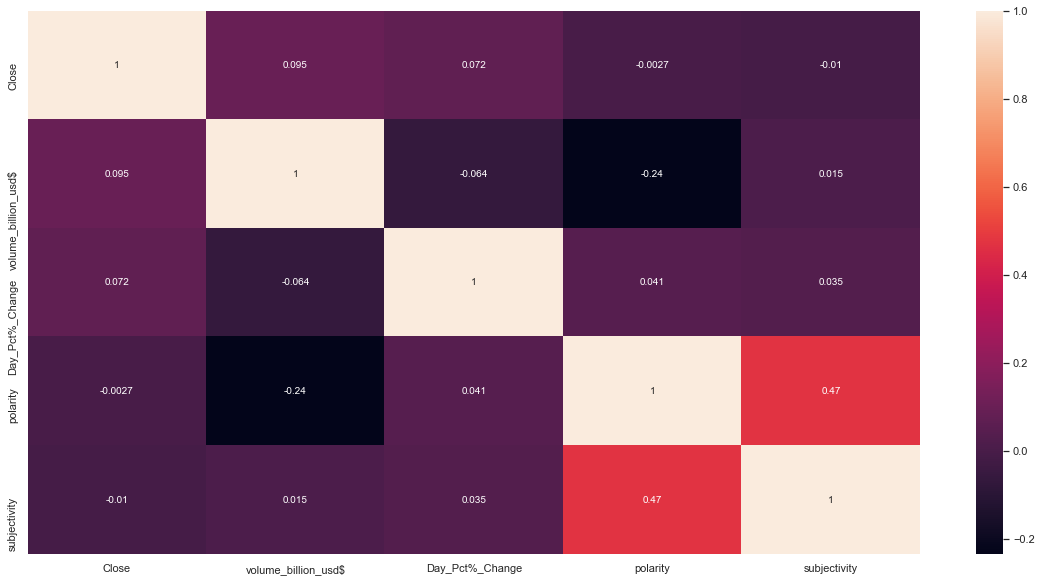

In [136]:
#there seems to be high correlation between high ,open ,close ,market_billion among each other 

#so if we want to apply logistic regression then we need to drop this variables 

bitcoin_master_df.drop(["market_billion_usd$"],axis = 1 ,inplace =True)

bitcoin_master_df

plt.figure(figsize=(20,10))
sns.heatmap(bitcoin_master_df.corr(),annot=True)

# Applying Machine Learning Models 


# Since we have output as categorical variable as we want to predict the rise and fall of crypto currencies 

# so we go for supervised classification machine learning algorithms 



# 1. Logistic Regression Model 

In [191]:
bitcoin_master_df

,Name,Symbol,Date,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,Bitcoin,BTC,2021-01-02,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,Bitcoin,BTC,2021-01-03,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,Bitcoin,BTC,2021-01-04,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,Bitcoin,BTC,2021-01-05,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,Bitcoin,BTC,2021-01-06,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,Bitcoin,BTC,2021-01-07,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,Bitcoin,BTC,2021-01-08,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,Bitcoin,BTC,2021-01-09,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,Bitcoin,BTC,2021-01-10,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,Bitcoin,BTC,2021-01-11,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


In [192]:
bitcoin_master_df.dtypes

Name                           object
Symbol                         object
Date                   datetime64[ns]
High                          float64
Low                           float64
Open                          float64
Close                         float64
market_billion_usd$             int64
volume_billion_usd$           float64
Day_Pct%_Change               float64
Trend                          object
Target                       category
polarity                      float64
subjectivity                  float64
dtype: object

In [193]:
bitcoin_master_df["Target"] = bitcoin_master_df["Target"].astype("int")

In [194]:
#Name ,symbol and Date are of no use so we will drop them and move for further analysing 

bitcoin_master_df.drop(["Name","Symbol","Date"],axis = 1,inplace =True)

bitcoin_master_df



,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


# Dummy Encode the Categorical Variables

# 1. Split the dependent and independent variables.

In [195]:
# store the target variable 'Target' in a dataframe 'df_target'
df_target = bitcoin_master_df['Target']

# store all the independent variables in a dataframe 'df_feature' 
# drop the column 'Chance of Admit' using drop()
# 'axis = 1' drops the specified column
df_feature = bitcoin_master_df.drop('Target', axis = 1)

# 2. Filter numerical and categorical variables.

In [196]:
# filter the numerical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.number]' will include all the numerical variables
df_num = df_feature.select_dtypes(include = [np.number])

# display numerical features
df_num.columns

Index(['High', 'Low', 'Open', 'Close', 'market_billion_usd$',
       'volume_billion_usd$', 'Day_Pct%_Change', 'polarity', 'subjectivity'],
      dtype='object')

In [197]:
# filter the categorical features in the dataset
# 'select_dtypes' is used to select the variables with given data type
# 'include = [np.object]' will include all the categorical variables
df_cat = df_feature.select_dtypes(include = [np.object])

# display categorical features
df_cat.columns

Index(['Trend'], dtype='object')

# The logistic regression method fails in presence of categorical variables. To overcome this we use (n-1) dummy encoding. 

# **Encode the each categorical variable and create (n-1) dummy variables for n categories of the variable.**

In [198]:
# use 'get_dummies' from pandas to create dummy variables
# use 'drop_first' to create (n-1) dummy variables
dummy_var = pd.get_dummies(data = df_cat, drop_first = True)
dummy_var

,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0
8,1,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0


# 3. Scale the Data 

# We scale the variables to get all the variables in the same range.

With this, we can avoid a problem in which some features come to dominate solely because 
they tend to have larger values than others.

In [199]:
# initialize the standard scalar
X_scaler = StandardScaler()

# scale all the numerical columns
# standardize all the columns of the dataframe 'df_num'
num_scaled = X_scaler.fit_transform(df_num)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
df_num_scaled = pd.DataFrame(num_scaled, columns = df_num.columns)

df_num_scaled

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
0,-1.395898,-1.460271,-1.618626,-1.351071,-1.366818,0.264745,1.885746,-0.005967,0.804276
1,-1.250609,-1.165737,-1.344017,-1.285538,-1.302457,0.652029,0.377826,-0.872413,-0.215619
2,-1.367399,-1.496917,-1.276032,-1.366620,-1.382909,0.741616,-0.549226,0.730488,1.201338
3,-1.267700,-1.347873,-1.359215,-1.164392,-1.179097,0.253338,1.258094,-0.284672,-0.212211
4,-1.023582,-1.020344,-1.156065,-0.880951,-0.894834,0.530971,1.671622,0.195351,1.820639
5,-0.693641,-0.724217,-0.874741,-0.626061,-0.642751,0.870665,1.380643,-0.973482,-0.940150
6,-0.517071,-0.689657,-0.620586,-0.483279,-0.497937,0.990631,0.703767,-0.510931,0.682130
7,-0.568091,-0.476576,-0.480249,-0.537633,-0.551572,0.053841,-0.314835,-0.303667,0.936207
8,-0.569706,-0.774603,-0.533558,-0.727610,-0.744657,0.699203,-1.010583,-0.345947,0.197899
9,-0.876955,-1.315207,-0.723852,-1.006832,-1.023557,2.241884,-1.536494,-0.699913,0.503219


In [200]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
X = pd.concat([df_num_scaled, dummy_var], axis = 1)

# display first five observations
X.head()

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,-1.395898,-1.460271,-1.618626,-1.351071,-1.366818,0.264745,1.885746,-0.005967,0.804276,0,0,1,0,0,0,0,0
1,-1.250609,-1.165737,-1.344017,-1.285538,-1.302457,0.652029,0.377826,-0.872413,-0.215619,0,0,0,0,1,0,0,0
2,-1.367399,-1.496917,-1.276032,-1.366620,-1.382909,0.741616,-0.549226,0.730488,1.201338,0,0,0,1,0,0,0,0
3,-1.267700,-1.347873,-1.359215,-1.164392,-1.179097,0.253338,1.258094,-0.284672,-0.212211,0,0,0,0,0,0,0,0
4,-1.023582,-1.020344,-1.156065,-0.880951,-0.894834,0.530971,1.671622,0.195351,1.820639,0,0,1,0,0,0,0,0


# 4. Train -Test -split 



Before applying various classification techniques to predict the admission status of the student, let us split the dataset in train and test set.

In [258]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (148, 18)
y_train (148,)
X_test (38, 18)
y_test (38,)


### Create a generalized function to create a dataframe containing the scores for the models.

In [202]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Probability Cutoff', 'AUC Score', 'Precision Score', 'Recall Score',
                                       'Accuracy Score', 'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for model comparision are 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score',
# 'Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model, cutoff):
    
    # let 'y_pred_prob' be the predicted values of y
    y_pred_prob = logreg.predict(X_test)

    # convert probabilities to 0 and 1 using 'if_else'
    y_pred = [ 0 if x < cutoff else 1 for x in y_pred_prob]
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Probability Cutoff': cutoff,
                                    'AUC Score' : metrics.roc_auc_score(y_test, y_pred),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score':metrics.cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)

# <a id="logit"></a>
 # 3. Logistic Regression (Full Model)

In [149]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [172]:
x=X[["const","Close","Low","market_billion_usd$","polarity","subjectivity"]]
x

KeyError: "['Low', 'market_billion_usd$'] not in index"

In [253]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model



logreg = sm.Logit(df_target, df_numeric_features_vif).fit()

# print the summary of the model
print(logreg.summary())

         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [174]:
y_pred = logreg.predict(x)

y_pred = [0 if x<0.5 else 1 for x in y_pred]
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1]

In [175]:
accuracy_score(df_target,y_pred)

0.5752688172043011

In [176]:
X


,const,Close,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,1.000000,-1.351071,0.264745,1.885746,-0.005967,0.804276,0,0,1,0,0,0,0,0
1,1.000000,-1.285538,0.652029,0.377826,-0.872413,-0.215619,0,0,0,0,1,0,0,0
2,1.000000,-1.366620,0.741616,-0.549226,0.730488,1.201338,0,0,0,1,0,0,0,0
3,1.000000,-1.164392,0.253338,1.258094,-0.284672,-0.212211,0,0,0,0,0,0,0,0
4,1.000000,-0.880951,0.530971,1.671622,0.195351,1.820639,0,0,1,0,0,0,0,0
5,1.000000,-0.626061,0.870665,1.380643,-0.973482,-0.940150,0,0,0,0,0,0,0,0
6,1.000000,-0.483279,0.990631,0.703767,-0.510931,0.682130,0,0,0,0,0,0,0,0
7,1.000000,-0.537633,0.053841,-0.314835,-0.303667,0.936207,0,0,0,1,0,0,0,0
8,1.000000,-0.727610,0.699203,-1.010583,-0.345947,0.197899,1,0,0,0,0,0,0,0
9,1.000000,-1.006832,2.241884,-1.536494,-0.699913,0.503219,0,1,0,0,0,0,0,0


In [211]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = X_train.iloc[:,1:6]
X_test_rfe = X_test.iloc[:,1:6]

# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg,n_features_to_select=3)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Open', 'Close', 'market_billion_usd$'], dtype='object')


In [232]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model
# consider the variables obtained from RFE method and the intercept term
logreg_rfe = sm.Logit(y_train, X_train[['Open', 'Close','volume_billion_usd$' ,'polarity']]).fit()

# print the summary of the model
print(logreg_rfe.summary())

Optimization terminated successfully.
         Current function value: 0.027917
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  148
Model:                          Logit   Df Residuals:                      144
Method:                           MLE   Df Model:                            3
Date:                Sat, 25 Sep 2021   Pseudo R-squ.:                  0.9597
Time:                        16:26:38   Log-Likelihood:                -4.1318
converged:                       True   LL-Null:                       -102.46
Covariance Type:            nonrobust   LLR p-value:                 2.217e-42
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Open                 -347.5249    179.853     -1.932      0.053    -700.030       4.980
C

In [260]:
# 'aic' retuns the AIC value for the model
print('AIC:', clf.aic)

AttributeError: 'LogisticRegression' object has no attribute 'aic'

In [235]:
# let 'y_pred_prob_rfe' be the predicted values of y
y_pred_prob_rfe = logreg_rfe.predict(X_test[['Open', 'Close','volume_billion_usd$' ,'polarity']])

# print the y_pred_prob_rfe
y_pred_prob_rfe.head()

61    0.000000
116   0.000051
5     1.000000
102   0.000001
72    0.000000
dtype: float64

In [238]:
# convert probabilities to 0 and 1 using 'if_else'
y_pred_rfe = [ 0 if x < 0.5 else 1 for x in y_pred_prob_rfe]

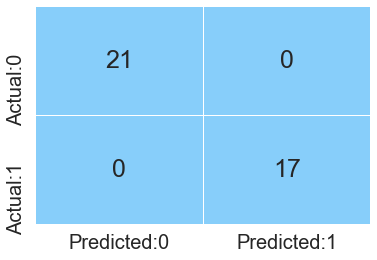

In [239]:
# create a confusion matrix
# pass the actual and predicted target values to the confusion_matrix()
cm = confusion_matrix(y_test, y_pred_rfe)

# label the confusion matrix  
# pass the matrix as 'data'
# pass the required column names to the parameter, 'columns'
# pass the required row names to the parameter, 'index'
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 20)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 20)

# display the plot
plt.show()

Train accuracy: 0.97
Test accuracy: 0.97

Test confusion_matrix


Text(30.5, 0.5, 'True')

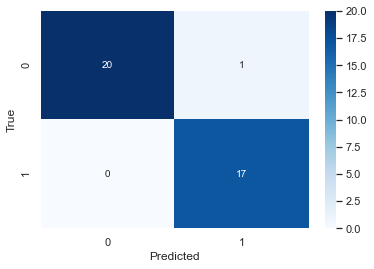

In [259]:




from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train[['Day_Pct%_Change', 'Trend_Among top losers', 'Trend_Negative',
                 'Trend_Positive', 'Trend_Slight Negative', 'Trend_Slight Positive']], y_train) # Make predictions
y_pred = clf.predict(X_test[['Day_Pct%_Change', 'Trend_Among top losers', 'Trend_Negative',
       'Trend_Positive', 'Trend_Slight Negative', 'Trend_Slight Positive']]) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train[['Day_Pct%_Change', 'Trend_Among top losers', 'Trend_Negative',
       'Trend_Positive', 'Trend_Slight Negative', 'Trend_Slight Positive']])), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [249]:
# filter the numerical features in the dataset
df_numeric_features_vif = X.iloc[:,1:].select_dtypes(include=[np.number])

# display the first five observations
df_numeric_features_vif.head()

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,-1.395898,-1.460271,-1.618626,-1.351071,-1.366818,0.264745,1.885746,-0.005967,0.804276,0,0,1,0,0,0,0,0
1,-1.250609,-1.165737,-1.344017,-1.285538,-1.302457,0.652029,0.377826,-0.872413,-0.215619,0,0,0,0,1,0,0,0
2,-1.367399,-1.496917,-1.276032,-1.366620,-1.382909,0.741616,-0.549226,0.730488,1.201338,0,0,0,1,0,0,0,0
3,-1.267700,-1.347873,-1.359215,-1.164392,-1.179097,0.253338,1.258094,-0.284672,-0.212211,0,0,0,0,0,0,0,0
4,-1.023582,-1.020344,-1.156065,-0.880951,-0.894834,0.530971,1.671622,0.195351,1.820639,0,0,1,0,0,0,0,0


In [251]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

    VIF_Factor                   Features
0     1.079164                       High
1     1.192480        volume_billion_usd$
2     5.481956            Day_Pct%_Change
3     1.451269                   polarity
4     1.356949               subjectivity
5     1.925120     Trend_Among top losers
6     2.445521            Trend_Bear drop
7     2.919569             Trend_Bull run
8     1.204229             Trend_Negative
9     1.151400             Trend_Positive
10    1.030804      Trend_Slight Negative
11    1.010106      Trend_Slight Positive
12    1.032775  Trend_Slight or No change


In [250]:
# create an empty dataframe to store the VIF for each variable
vif = pd.DataFrame()

# calculate VIF using list comprehension 
# use for loop to access each variable 
# calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

# create a column of variable names
vif["Features"] = df_numeric_features_vif.columns

# sort the dataframe based on the values of VIF_Factor in descending order
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

,VIF_Factor,Features
0,8519.189389,Close
1,7902.671410,market_billion_usd$
2,762.072046,Open
3,287.382152,High
4,135.472406,Low
5,33.967335,Day_Pct%_Change
6,3.273607,Trend_Bear drop
7,3.248503,Trend_Bull run
8,2.011933,Trend_Among top losers
9,1.579049,polarity


In [252]:
df_numeric_features_vif

,High,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity,Trend_Among top losers,Trend_Bear drop,Trend_Bull run,Trend_Negative,Trend_Positive,Trend_Slight Negative,Trend_Slight Positive,Trend_Slight or No change
0,-1.395898,0.264745,1.885746,-0.005967,0.804276,0,0,1,0,0,0,0,0
1,-1.250609,0.652029,0.377826,-0.872413,-0.215619,0,0,0,0,1,0,0,0
2,-1.367399,0.741616,-0.549226,0.730488,1.201338,0,0,0,1,0,0,0,0
3,-1.267700,0.253338,1.258094,-0.284672,-0.212211,0,0,0,0,0,0,0,0
4,-1.023582,0.530971,1.671622,0.195351,1.820639,0,0,1,0,0,0,0,0
5,-0.693641,0.870665,1.380643,-0.973482,-0.940150,0,0,0,0,0,0,0,0
6,-0.517071,0.990631,0.703767,-0.510931,0.682130,0,0,0,0,0,0,0,0
7,-0.568091,0.053841,-0.314835,-0.303667,0.936207,0,0,0,1,0,0,0,0
8,-0.569706,0.699203,-1.010583,-0.345947,0.197899,1,0,0,0,0,0,0,0
9,-0.876955,2.241884,-1.536494,-0.699913,0.503219,0,1,0,0,0,0,0,0


In [256]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = df_numeric_features_vif

y_train = df_target
# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Day_Pct%_Change', 'Trend_Among top losers', 'Trend_Negative',
       'Trend_Positive', 'Trend_Slight Negative', 'Trend_Slight Positive'],
      dtype='object')


In [262]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       0.94      1.00      0.97        17

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



<Figure size 72x1440 with 0 Axes>

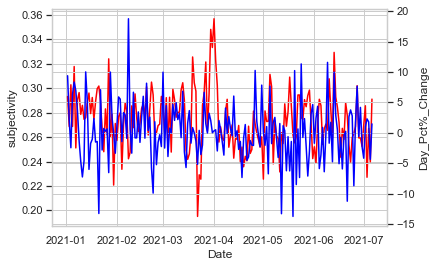

In [12]:
#Analyzing trends between  polarity and closing price 

plt.figure(figsize=(1,20))

fig,ax = plt.subplots()


sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["subjectivity"], color="red",ax=ax)

ax2=ax.twinx()

sns.lineplot(bitcoin_master_df["Date"],bitcoin_master_df["Day_Pct%_Change"],color="blue",ax=ax2)

plt.show()


fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

In [13]:
##########

In [14]:
df=bitcoin_master_df.copy()
df

,Name,Symbol,Date,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,Trend,Target,polarity,subjectivity
0,Bitcoin,BTC,2021-01-02,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,Bull run,1,0.086922,0.293221
1,Bitcoin,BTC,2021-01-03,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,Positive,1,0.067089,0.268607
2,Bitcoin,BTC,2021-01-04,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,Negative,0,0.103779,0.302804
3,Bitcoin,BTC,2021-01-05,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,Among top gainers,1,0.080542,0.268689
4,Bitcoin,BTC,2021-01-06,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,Bull run,1,0.091530,0.317750
5,Bitcoin,BTC,2021-01-07,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,Among top gainers,1,0.064775,0.251121
6,Bitcoin,BTC,2021-01-08,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,Among top gainers,1,0.075363,0.290273
7,Bitcoin,BTC,2021-01-09,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,Negative,0,0.080107,0.296405
8,Bitcoin,BTC,2021-01-10,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,Among top losers,0,0.079140,0.278587
9,Bitcoin,BTC,2021-01-11,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,Bear drop,0,0.071037,0.285956


In [15]:
df_numeric = df.select_dtypes(np.number)
df_numeric

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
0,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,0.086922,0.293221
1,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,0.067089,0.268607
2,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,0.103779,0.302804
3,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,0.080542,0.268689
4,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,0.091530,0.317750
5,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,0.064775,0.251121
6,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,0.075363,0.290273
7,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,0.080107,0.296405
8,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,0.079140,0.278587
9,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,0.071037,0.285956


In [16]:
df_numeric.corr()

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
High,1.000000,0.985217,0.991751,0.990768,0.990812,0.130125,-0.031232,-0.013261,-0.019112
Low,0.985217,1.000000,0.983706,0.990062,0.990283,0.053307,-0.004184,0.008099,-0.019222
Open,0.991751,0.983706,1.000000,0.977975,0.978234,0.114664,-0.133356,-0.012935,-0.023018
Close,0.990768,0.990062,0.977975,1.000000,0.999920,0.094662,0.071716,-0.002728,-0.010293
market_billion_usd$,0.990812,0.990283,0.978234,0.999920,1.000000,0.091374,0.070066,-0.000596,-0.012769
volume_billion_usd$,0.130125,0.053307,0.114664,0.094662,0.091374,1.000000,-0.063619,-0.235069,0.014833
Day_Pct%_Change,-0.031232,-0.004184,-0.133356,0.071716,0.070066,-0.063619,1.000000,0.040540,0.034692
polarity,-0.013261,0.008099,-0.012935,-0.002728,-0.000596,-0.235069,0.040540,1.000000,0.471211
subjectivity,-0.019112,-0.019222,-0.023018,-0.010293,-0.012769,0.014833,0.034692,0.471211,1.000000


In [19]:
# filter the numerical features in the dataset
df_numeric_features_vif = df_numeric.copy()

# display the first five observations
df_numeric_features_vif.head()

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
0,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,0.086922,0.293221
1,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,0.067089,0.268607
2,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,0.103779,0.302804
3,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,0.080542,0.268689
4,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,0.091530,0.317750


In [20]:
# for each numeric variable, calculate VIF and save it in a dataframe 'vif'
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# use for loop to iterate the VIF function 
for ind in range(len(df_numeric_features_vif.columns)):
    
    # create an empty dataframe
    vif = pd.DataFrame()

    # calculate VIF using list comprehension
    # use for loop to access each variable 
    # calculate VIF for each variable and create a column 'VIF_Factor' to store the values 
    vif["VIF_Factor"] = [variance_inflation_factor(df_numeric_features_vif.values, i) for i in range(df_numeric_features_vif.shape[1])]

    # create a column of variable names
    vif["Features"] = df_numeric_features_vif.columns

    # filter the variables with VIF greater than 10 and store it in a dataframe 'multi' 
    # one can choose the threshold other than 10 (it depends on the business requirements)
    multi = vif[vif['VIF_Factor'] > 10]
    
    # if dataframe 'multi' is not empty, then sort the dataframe by VIF values
    # if dataframe 'multi' is empty (i.e. all VIF <= 10), then print the dataframe 'vif' and break the for loop using 'break' 
    # 'by' sorts the data using given variable(s)
    # 'ascending = False' sorts the data in descending order
    if(multi.empty == False):
        df_sorted = multi.sort_values(by = 'VIF_Factor', ascending = False)
    else:
        print(vif)
        break
    
    # use if-else to drop the variable with the highest VIF
    # if  dataframe 'df_sorted' is not empty, then drop the first entry in the column 'Features' from the numeric variables
    # select the variable using 'iloc[]'
    # 'axis=1' drops the corresponding column
    #  else print the final dataframe 'vif' with all values after removal of variables with VIF less than 10  
    if (df_sorted.empty == False):
        df_numeric_features_vif = df_numeric_features_vif.drop(df_sorted.Features.iloc[0], axis=1)
    else:
        print(vif)

   VIF_Factor             Features
0    3.690804  volume_billion_usd$
1    1.006311      Day_Pct%_Change
2    3.699658             polarity


In [22]:
df_features = df_numeric_features_vif.copy()
df_target = bitcoin_master_df[["Target"]]
df_target

,Target
0,1
1,1
2,0
3,1
4,1
5,1
6,1
7,0
8,0
9,0


In [23]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = df_features
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (148, 4)
y_train (148, 1)
X_test (38, 4)
y_test (38, 1)


In [143]:
# build the model on train data (X_train and y_train)
# use fit() to fit the logistic regression model



logreg = sm.Logit(y_train, X_train).fit()

# print the summary of the model
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.361803
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 Target   No. Observations:                  148
Model:                          Logit   Df Residuals:                      143
Method:                           MLE   Df Model:                            4
Date:                Mon, 27 Sep 2021   Pseudo R-squ.:                  0.4774
Time:                        12:54:39   Log-Likelihood:                -53.547
converged:                       True   LL-Null:                       -102.46
Covariance Type:            nonrobust   LLR p-value:                 2.843e-20
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4466      0.287     -1.558      0.119      -1.008       0.115
Hi

Train accuracy: 1.0
Test accuracy: 0.97

Test confusion_matrix


Text(30.5, 0.5, 'True')

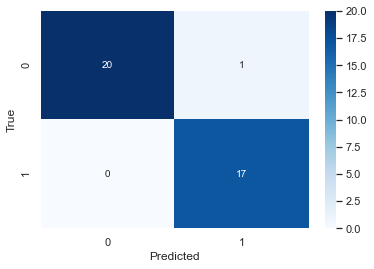

In [25]:




from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [88]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = bitcoin_master_df[["Low","volume_billion_usd$","polarity","market_billion_usd$"]]
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (148, 5)
y_train (148, 1)
X_test (38, 5)
y_test (38, 1)


Train accuracy: 0.74
Test accuracy: 0.68

Test confusion_matrix


Text(30.5, 0.5, 'True')

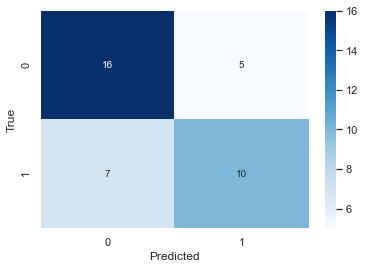

In [89]:




from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

<AxesSubplot:>

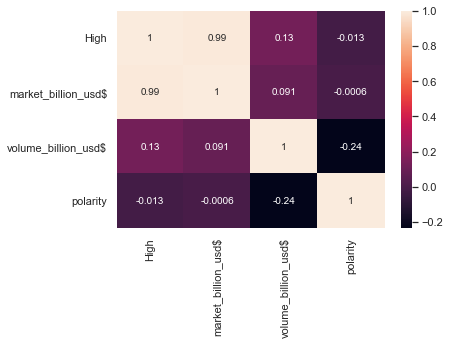

In [144]:
sns.heatmap(df_numeric_sc[['High', 'market_billion_usd$', 'volume_billion_usd$','polarity']].corr(),annot= True)

In [125]:
# consider the independent variables (without the intercept term)
# as, X_train and X_test contains the intercept term
# use 'iloc' to select the variables wthout intercept term 
X_train_rfe = df_numeric_sc

y_train = df_target
# initiate logistic regression model to use in feature selection
logreg = LogisticRegression()

# build the RFE model
# pass the logistic regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator = logreg)

# fit the RFE model on the train dataset using fit()
rfe_model = rfe_model.fit(X_train_rfe, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_rfe.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['Open', 'Close', 'market_billion_usd$', 'Day_Pct%_Change'], dtype='object')


In [99]:
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = bitcoin_master_df[list(signi_feat_rfe)]
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (148, 5)
y_train (148, 1)
X_test (38, 5)
y_test (38, 1)


Train accuracy: 0.97
Test accuracy: 0.97

Test confusion_matrix


Text(30.5, 0.5, 'True')

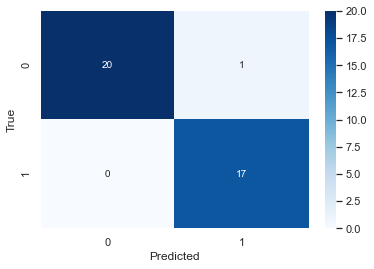

In [100]:




from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)

In [132]:
df_numeric_sc = df_numeric.copy()
df_numeric_sc

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
0,33155.118820,29091.181190,29376.455830,32127.267940,597,67.865421,9.372581,0.086922,0.293221
1,34608.556740,32052.317080,32129.407360,32782.024470,609,78.665235,2.038009,0.067089,0.268607
2,33440.218570,28722.755270,32810.947640,31971.913520,594,81.163475,-2.471205,0.103779,0.302804
3,34437.590590,30221.186740,31977.041130,33992.429340,632,67.547325,6.319659,0.080542,0.268689
4,36879.698570,33514.033740,34013.614530,36824.364410,685,75.289434,8.331076,0.091530,0.317750
5,40180.367910,36491.189810,36833.874360,39371.042350,732,84.762141,6.915742,0.064775,0.251121
6,41946.739350,36838.636000,39381.765840,40797.610720,759,88.107519,3.623395,0.075363,0.290273
7,41436.350010,38980.876910,40788.640520,40254.546500,749,61.984163,-1.331118,0.080107,0.296405
8,41420.191030,35984.627120,40254.217800,38356.439510,713,79.980748,-4.715261,0.079140,0.278587
9,38346.529500,30549.598770,38346.529500,35566.655940,661,123.000000,-7.273312,0.071037,0.285956


In [133]:
mx=StandardScaler()
numeric_scaled = mx.fit_transform(df_numeric_sc)
df_numeric_sc = pd.DataFrame(numeric_scaled,columns=df_numeric_sc.columns)
df_numeric_sc

,High,Low,Open,Close,market_billion_usd$,volume_billion_usd$,Day_Pct%_Change,polarity,subjectivity
0,-1.395898,-1.460271,-1.618626,-1.351071,-1.366818,0.264745,1.885746,-0.005967,0.804276
1,-1.250609,-1.165737,-1.344017,-1.285538,-1.302457,0.652029,0.377826,-0.872413,-0.215619
2,-1.367399,-1.496917,-1.276032,-1.366620,-1.382909,0.741616,-0.549226,0.730488,1.201338
3,-1.267700,-1.347873,-1.359215,-1.164392,-1.179097,0.253338,1.258094,-0.284672,-0.212211
4,-1.023582,-1.020344,-1.156065,-0.880951,-0.894834,0.530971,1.671622,0.195351,1.820639
5,-0.693641,-0.724217,-0.874741,-0.626061,-0.642751,0.870665,1.380643,-0.973482,-0.940150
6,-0.517071,-0.689657,-0.620586,-0.483279,-0.497937,0.990631,0.703767,-0.510931,0.682130
7,-0.568091,-0.476576,-0.480249,-0.537633,-0.551572,0.053841,-0.314835,-0.303667,0.936207
8,-0.569706,-0.774603,-0.533558,-0.727610,-0.744657,0.699203,-1.010583,-0.345947,0.197899
9,-0.876955,-1.315207,-0.723852,-1.006832,-1.023557,2.241884,-1.536494,-0.699913,0.503219


X_train (148, 5)
y_train (148, 1)
X_test (38, 5)
y_test (38, 1)
Train accuracy: 0.76
Test accuracy: 0.61

Test confusion_matrix
              precision    recall  f1-score   support

           0       0.71      0.48      0.57        21
           1       0.54      0.76      0.63        17

    accuracy                           0.61        38
   macro avg       0.63      0.62      0.60        38
weighted avg       0.64      0.61      0.60        38



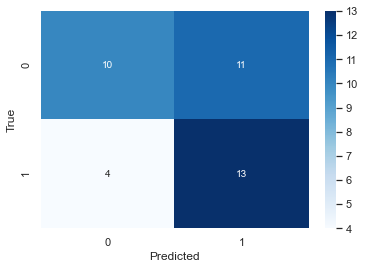

In [145]:
#######scaled
# add a constant column to the dataframe
# while using the 'Logit' method in the Statsmodels library, the method do not consider the intercept by default
# we can add the intercept to the set of independent variables using 'add_constant()'
X = df_numeric_sc[['High', 'market_billion_usd$', "polarity","volume_billion_usd$"]]
X = sm.add_constant(X)

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.2)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)






from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=200)
# Train the model
clf.fit(X_train, y_train) # Make predictions
y_pred = clf.predict(X_test) # Predictions
y_true = y_test 
# True values # Measure accuracy
from sklearn.metrics import accuracy_score
import numpy as np
print("Train accuracy:", np.round(accuracy_score(y_train, clf.predict(X_train)), 2))
print("Test accuracy:", np.round(accuracy_score(y_true, y_pred), 2)) 
# Make the confusion matrix
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print("\nTest confusion_matrix")
sns.heatmap(cf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
print(classification_report(y_true,y_pred))

In [147]:
#Calculate AUC 
from sklearn.metrics import roc_curve, auc
fpr, tpr, treshold = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)
#auc is 0.96

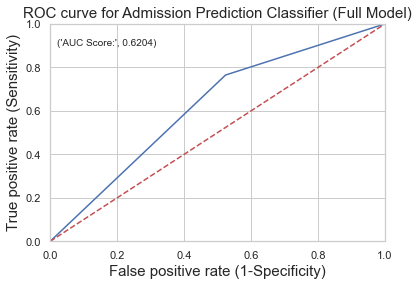

In [158]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Admission Prediction Classifier (Full Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred),4)))
                               
# plot the grid
plt.grid(True)

In [162]:
AUC =round(metrics.roc_auc_score(y_test, y_pred),4)
# Gini = (2*AUC–1)

# Gini
(2*AUC - 1)*100

24.07999999999999

In [157]:
(2*AUC-1)*100

24.07999999999999